In [51]:
%matplotlib inline  
#sử dụng thay cho pt.show()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from icecream import ic

# <font color="red">B1:Truy cập/đọc  data raw </font>

In [52]:
print(sklearn.__version__)
#check version cuar scikit-learn

1.1.3


In [53]:
from sklearn.datasets import load_boston
boston_data = load_boston()
#đọc data về giá nhà (Bước 1: Truy cập data)

c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [54]:
print(boston_data.DESCR)
#Đọc mô tả về tập dư liệu

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# <font color="red">B2:Tiền xử lý dữ liệu </font>

### Tìm sự tương quan giữa các đặc trưng

In [55]:
print("Keys: ", boston_data.keys())
#xác định các khóa chính của tập data

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [56]:
ic('data')
print(boston_data.data)
ic('target')
print(boston_data.target)
ic('feature_names')
print(boston_data.feature_names)
ic('DESCR')
print(boston_data.DESCR)
ic('filename')
print(boston_data.filename)
ic('data_module')
print(boston_data.data_module)

ic| 'data'
ic| 'target'
ic| 'feature_names'
ic| 'DESCR'
ic| 'filename'


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

ic| 'data_module'


sklearn.datasets.data


In [57]:
print("Shape: ", boston_data.data.shape)
#kich cỡ của tập dữ liệu

Shape:  (506, 13)


In [58]:
print("Feature Names: ", boston_data.feature_names)
#Tên của các đặc trưng( tức là các cột)

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Chọn feature RM 

In [59]:
# truyền dữ liệu của Boston và khung dữ liệu của pandas
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head() # lấy 5 dòng đầu

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
#Dán nhãn lại các cột bằng cách sử dụng tên đặc trưng của tập dữ liệu Boston
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
# Thêm giá nhà vào tập dữ liệu
boston_data.target[:5]
# in 5 giá trị mục tiêu đầu tiên

array([24. , 21.6, 34.7, 33.4, 36.2])

In [62]:
print('Shape of target', boston_data.target.shape)
#kich co cua tập dữ liệu target(tổng cộng có 506 hàng)

Shape of target (506,)


In [63]:
bos_pd['PRICE'] = boston_data.target
#Gán cột mới(cột giá) có dữ liệu bằng với target (mục tiêu)
bos_pd.head() # lấy 5 giá trị đầu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Check xem dữ liệu có sạch ko dựa trên 2 yếu tố
- Ko null <br>
- Dữ liệu đều ở dạng số

In [64]:
bos_pd.dtypes
#check type xem có dạng số hết ko

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [65]:
bos_pd.isnull().sum()
#dem so cac gia tri null để check xem dữ liệu có sạch ko

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [66]:
bos_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [67]:
bos_pd.describe().transpose()
#Thống kê cơ bản

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


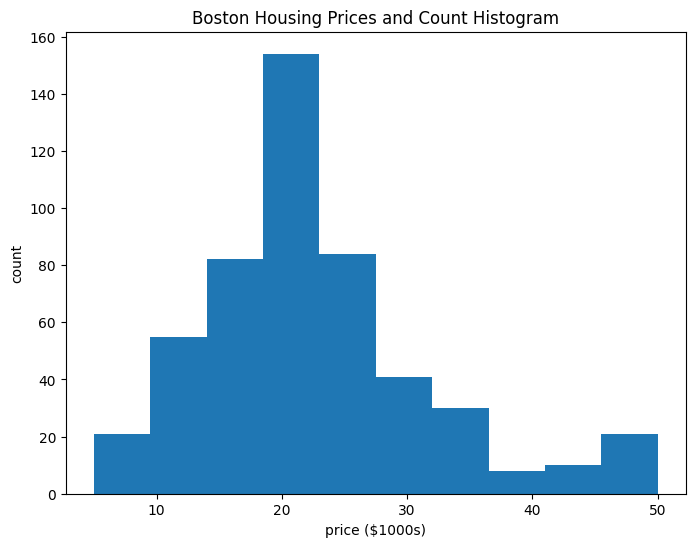

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(bos_pd['PRICE'])
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

C:\Users\duc\AppData\Local\Temp\ipykernel_21424\2260338045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bos_pd['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

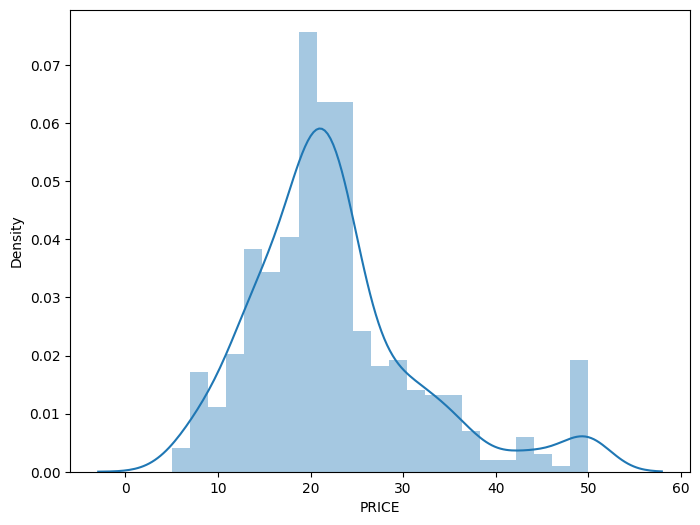

In [69]:
plt.figure(figsize=(8, 6))
sns.distplot(bos_pd['PRICE'])

<Axes: >

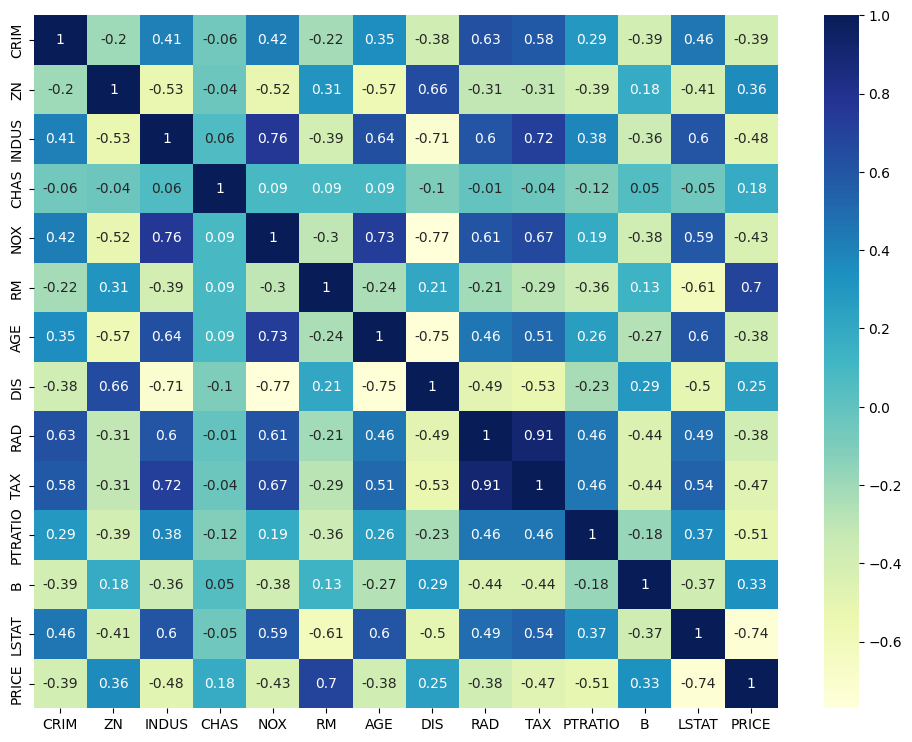

In [70]:
plt.figure(figsize=(12, 9))
correlation_matrix = bos_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

#### ở biểu đồ này, ta thấy price tỷ lê thuận cao nhất với RM, do đó ta thấy được sự tương quan giữa 2 đặc trưng RM và Price

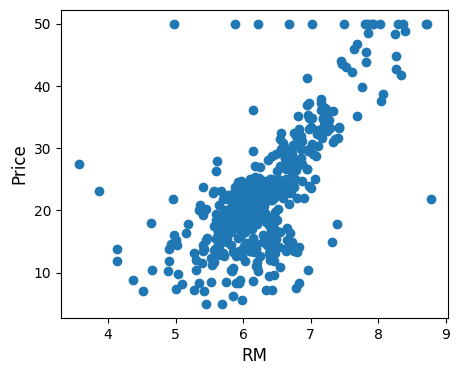

In [71]:
plt.figure(figsize=(5, 4))
plt.scatter(bos_pd['RM'], bos_pd['PRICE'])
plt.ylabel('Price', size=12)
plt.xlabel('RM', size=12)
plt.show()
# Biểu đồ tương quan của RM với PRICE

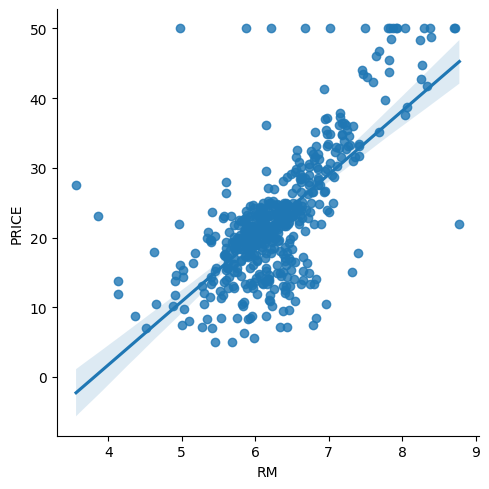

In [72]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos_pd)

### <font color = 'yellow' >StandardScaler vs Normalization<font>

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [98]:
# Normalization
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(bos_pd[['RM', 'PRICE']])
df_minmax[:5]



array([[0.57750527, 0.42222222],
       [0.5479977 , 0.36888889],
       [0.6943859 , 0.66      ],
       [0.65855528, 0.63111111],
       [0.68710481, 0.69333333]])

In [99]:
# StandardScaler
standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(bos_pd[['RM', 'PRICE']])
df_stdScale[:5]


array([[ 0.41367189,  0.15968566],
       [ 0.19427445, -0.10152429],
       [ 1.28271368,  1.32424667],
       [ 1.01630251,  1.18275795],
       [ 1.22857665,  1.48750288]])

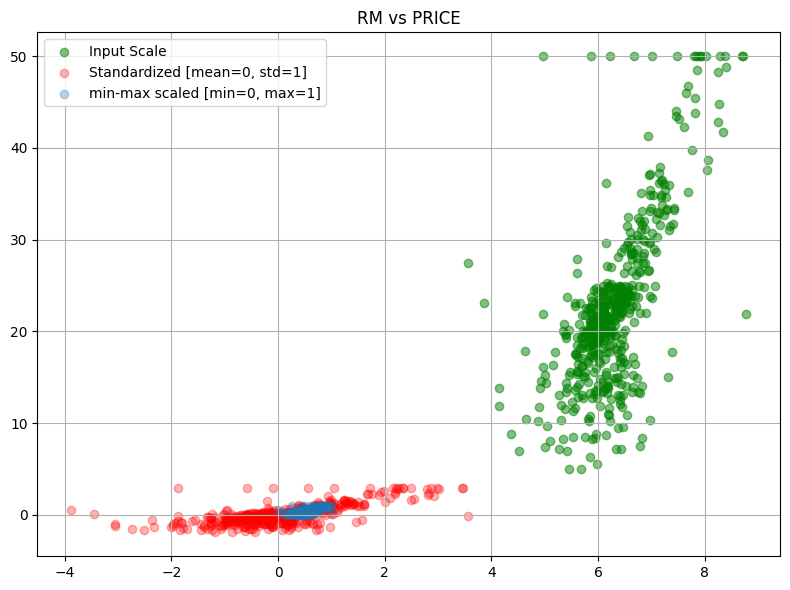

In [100]:
# vẽ biểu đo
plt.figure(figsize=(8,6))
plt.scatter(bos_pd['RM'], bos_pd['PRICE'],color='green', label='Input Scale', alpha=0.5)
plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)
plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)
plt.title('RM vs PRICE')

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

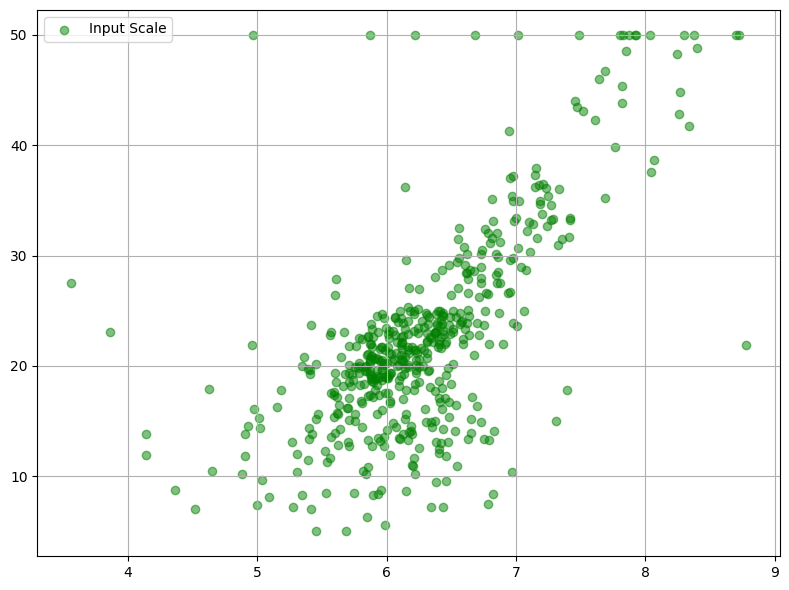

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(bos_pd['RM'], bos_pd['PRICE'],color='green', label='Input Scale', alpha=0.5)


plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

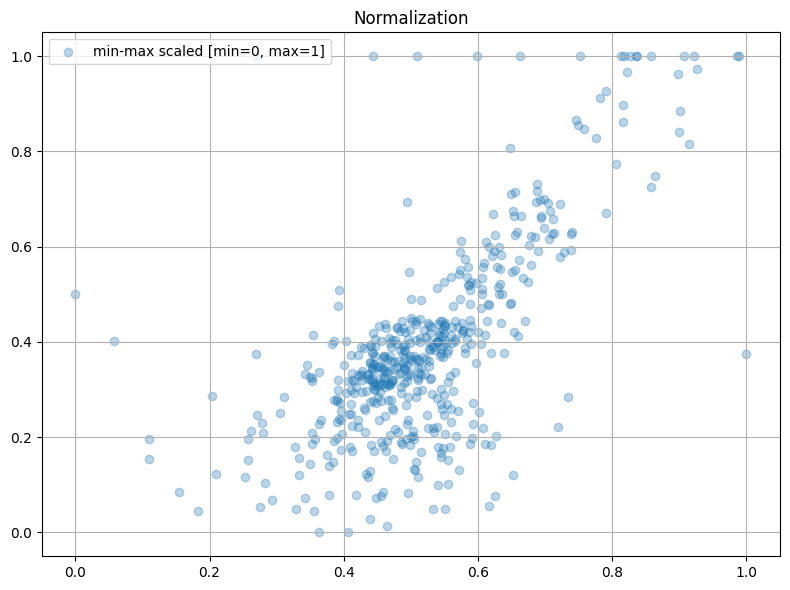

In [103]:
plt.figure(figsize=(8,6))

plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)
plt.title('Normalization')

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

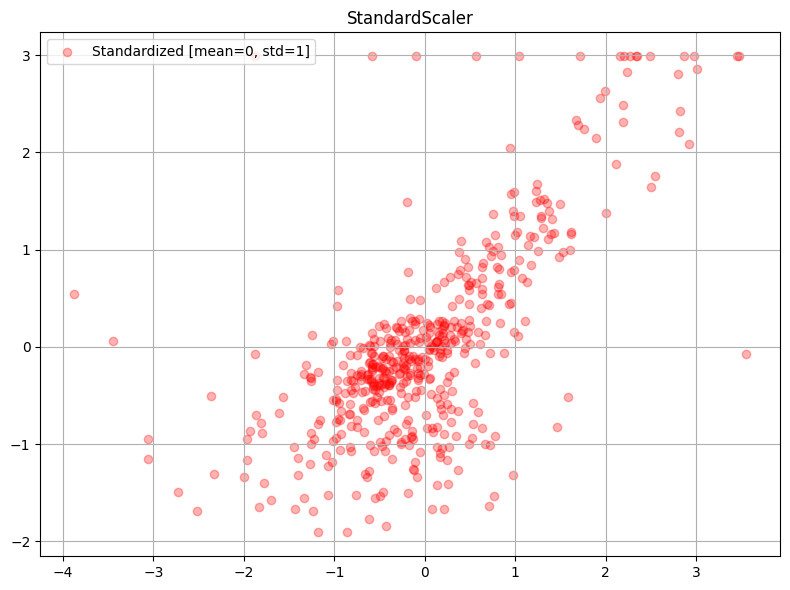

In [102]:
plt.figure(figsize=(8,6))

plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)

plt.title('StandardScaler')

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

#### trước khi chia dữ liệu thành tập dữ liệu để train - test, chúng ta cần chia dữ liệu thành hai giá trị : giá trị đích và giá trị dự báo. 
#### Gọi giá trị đích Y và các giá trị dự báo X

In [73]:
# tạo model
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


## Lấy các feature đã chọn
### Chia dữ liệu : Train , Test ( X_train, Y_train, X_test, Y_test)

In [74]:
#Sử dụng `train_test_split` để chia dữ liệu thành các tập con kiểm tra và huấn luyện ngẫu nhiên.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
#Tỷ lệ 80% train, 20% test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


# <font color = 'red'>3:Huấn luyện mô hình<font>

In [77]:
# Mô hình hồi quy tuyến tính
reg_all = LinearRegression()
reg_all.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>


####  So sánh kết quả dự đoán của mô hình trên tập X_test —> Y_test_predict với tập Y_test

In [78]:

y_train_predict = reg_all.predict(X_train)
#predict là dự đoán tập x_train

In [79]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [106]:
y_pred = reg_all.predict(X_test)
# y_pred là y dự báo

In [96]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 = round(reg_all.score(X_test, y_test),2)


print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665371
R^2: 0.67


## <font color = 'pink'>RMSE tự xây dựng<font>

In [82]:
ic(y_test.shape)
ic(y_pred.shape)
print('-----------------------------')
ic(y_test)
ic(y_pred)

ic| y_test.shape: (102,)
ic| y_pred.shape: (102,)
ic| y_test: 173    23.6
            274    32.4
            491    13.6
            72     22.8
            452    16.1
                   ... 
            412    17.9
            436     9.6
            411    17.2
            86     22.5
            75     21.4
            Name: PRICE, Length: 102, dtype: float64
ic| y_pred: array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
                   23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
                   24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
                   26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
                   27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
                   15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
                   22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
                   16.95125411, 31.23340153, 

-----------------------------


16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
                   21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
                   22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
                   22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
                   16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59783023,
                   20.51232627, 27.48111878, 11.01962332, 15.68096344, 23.79316251,
                    6.19929359, 21.6039073 , 41.41377225, 18.76548695,  8.87931901,
                   20.83076916, 13.25620627, 20.73963699,  9.36482222, 23.22444271,
                   31.9155003 , 19.10228271, 25.51579303, 29.04256769, 20.14358566,
                   25.5859787 ,  5.70159447, 20.09474756, 14.95069156, 12.50395648,
                   20.72635294, 24.73957161, -0.164237  , 13.68486682, 16.18359697,
                   22.27621999, 24.47902364])


array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [83]:
a = ((y_test - y_pred)**2)/len(y_test)
print(a)
b= np.array(a)
print(b)
ic(np.sum(b))

ic| np.sum(b): 24.29111947497387


173    0.285536
274    0.128870
491    0.014519
72     0.048840
452    0.069885
         ...   
412    3.199183
436    0.163590
411    0.010128
86     0.000491
75     0.092945
Name: PRICE, Length: 102, dtype: float64
[2.85535547e-01 1.28869843e-01 1.45191452e-02 4.88404993e-02
 6.98848898e-02 1.03836373e-01 1.85252464e-04 1.14128055e-03
 1.14215512e-01 1.43997243e-01 1.13901050e-01 6.68690177e-04
 1.67947830e+00 3.05638251e-03 5.35739925e-03 1.27539466e-01
 3.34717423e-02 1.90259104e-01 8.84740653e-01 1.20984327e-01
 4.11646024e-02 9.15340769e-03 1.80855576e-02 3.03954185e-02
 1.31371397e-01 4.06440552e-02 6.03700807e-02 1.02255159e-03
 5.31450549e-03 7.87633900e-03 4.35074907e-03 1.97628033e-02
 1.17317464e+00 9.41169777e-02 5.32648534e-02 5.87878082e-02
 1.17816715e-01 3.92171438e-03 3.94335474e-03 1.48876941e-02
 3.25039151e-01 1.61266800e-01 5.26393001e-01 5.16023052e-05
 2.14379576e-01 3.51359326e-02 9.22624241e-03 2.84474016e-02
 1.52857137e-03 3.47479690e-01 5.59354727e-02 1.092

24.29111947497387

In [84]:
# RMSE
rmse_make = np.sqrt(sum(b))
print(rmse_make)

4.928602182665372


## <font color = 'pink'>SCORE tự xây dựng<font>

In [105]:
# cách tính score không dùng hàm sum
sum = np.sum((y_train - y_train_predict)**2) # tổng bình phương còn lại

sum2 = np.sum((y_train-y_train.mean())**2) # tổng bình phương các điểm tốt nhất

r2_score = round((1 - sum/sum2),2)
print('R2 score is {}'.format(r2_score))

R2 score is 0.75


In [107]:
sum = np.sum((y_test - y_pred)**2) # tổng bình phương còn lại

sum2 = np.sum((y_test-y_test.mean())**2) # tổng bình phương các điểm tốt nhất

r2_score = round((1 - sum/sum2),2)
print('R2 score is {}'.format(r2_score))

R2 score is 0.67


In [85]:
print('Coefficient of determination: {:.4f}'.format(metrics.r2_score(y_test, y_pred)))

Coefficient of determination: 0.6688


C:\Users\duc\AppData\Local\Temp\ipykernel_21424\899026220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred) # sai số dự đoán


<Axes: xlabel='PRICE', ylabel='Density'>

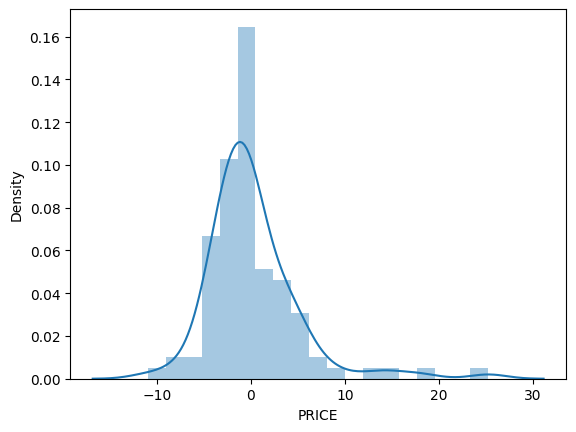

In [86]:
sns.distplot(y_test - y_pred) # sai số dự đoán

In [87]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.928602182665371 


In [88]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880
76,20.0,23.254429
316,17.8,17.662538
140,14.0,14.341190
471,19.6,23.013207
500,16.8,20.632456


<Axes: >

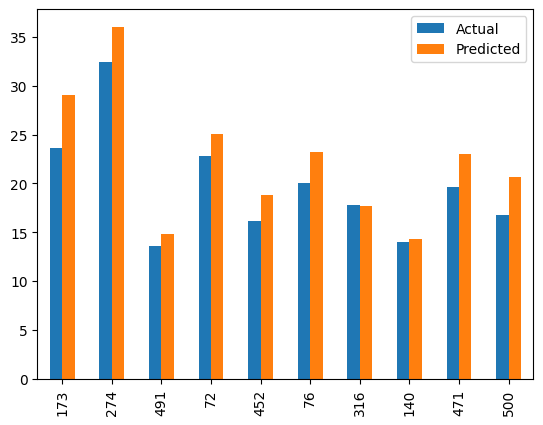

In [89]:
df2.plot(kind='bar')
# lập biểu đồ độ để dễ đánh giá